**Aikins Acheampong**

Fall 2024

CS 251: Data Analysis and Visualization

# Lab 4c | PCA and Image Compression

In the project, you will be taking advantage of the similarity across a set of similar images to compress the entire set. In the lab, you will be taking advantage of the similarty of across rows in a single image to compress the single image.

In [35]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-dark'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [7,7]})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Preparing the Grayscale Image

### 1a. Import and view an image

1. Import `lorikeet_grayscale.npy` using numpy's [load] (https://numpy.org/doc/stable/reference/generated/numpy.load.html)
2. Print the shape of the numpy array. It should be 2D with 678 rows and 907 columns. We will treat it as a grayscale image.
3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
4. Show the pyplot


(678, 907)


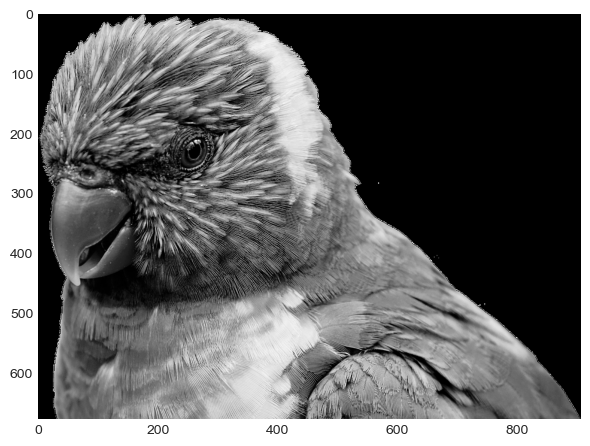

In [36]:
# Your code here
lorikeet_grayscale = np.load('img/lorikeet_grayscale.npy')
print(lorikeet_grayscale.shape)
plt.imshow(lorikeet_grayscale)
plt.show()

### 1b. Compute and display mean image row

1. In PCA, we use the principal components to reconstruct data by adding/substracting values from the mean. So let's look at the mean across all the features. That means we calculate the mean row of the image. Store it in a variable named `img_orig_means`. It should have the shape `(907,)`.
2. Plot the mean row (reshaped to `(1, 907)` using `imshow`. Since that image will be 1 row and 907 columns, it will not be tall enough for us to see the color unless we change the aspect ratio. Set the `aspect` parameter to `100`.

(907,)


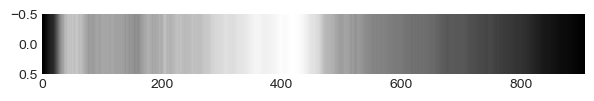

In [37]:
# Your code here
img_orig_means = lorikeet_grayscale.mean(axis=0)
print(img_orig_means.shape)
reshaped_mean = img_orig_means.reshape((1, -1))
plt.imshow(reshaped_mean, aspect=100)
plt.show()

*Question 1*: Can you relate the mean row to the entire image? I.e. does this make sense? 

*Answer 1*:
Yes, this make sense.The mean row provides a reasonable summary of the horizontal intensity distribution in the original image, capturing the major transitions between the bird's different colored regions.

## Task 2:  Compress the Image

### Find the Image's Principal Components

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to extract the image's eigenvectors and the principal components
1. Create an instance of the PCA class with 400 components (this means we compute only the first 400 principal components)
2. Call the method `fit_transform` with the image as the X parameter and saving the results into a new variable representing the Transformed values.
3. Print the shape of the Transformed values and the PCA's components.  The Transformed values should have the shape `(678, 400)` and the PCA's components should have the shape `(400, 907)`
4. Create an elbow plot of the [cumulative sum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) of the [PCA's](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) explained variance ratio.
    1. The x axis should be `# of Principal Components`
    2. The y axis should be `Proportional Variance Accounted for`
    3. Include a title, and x and y axis labels

Shape of Transformed Values: (678, 400)
Shape of PCA Components: (400, 907)


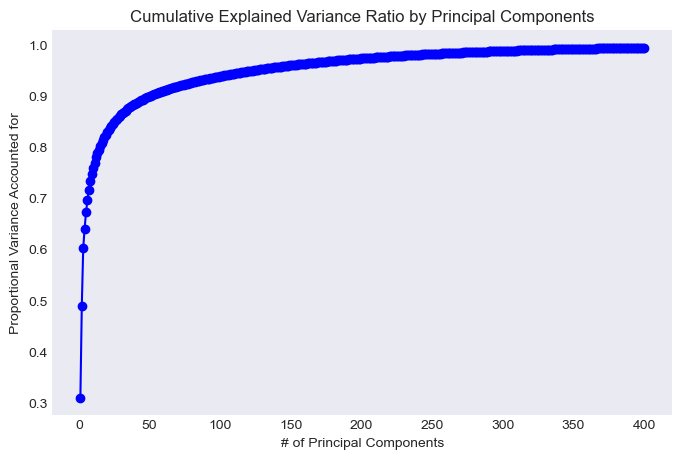

In [38]:
from sklearn.decomposition import PCA

# Your code here
pca = PCA(n_components=400)

transformed_lorikeet = pca.fit_transform(lorikeet_grayscale)

print("Shape of Transformed Values:", transformed_lorikeet.shape)
print("Shape of PCA Components:", pca.components_.shape)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 401), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.xlabel('# of Principal Components')
plt.ylabel('Proportional Variance Accounted for')
plt.show()


## Task 3: Reconstruct the Image 

### 3a. Reconstruct the image, given the number of principal components

Below we supply the code and the instructions to write a function that reconstructs an image and displays it:
1. Compute the inverse transform:
    1. `transformed_values @ principal_components + orig_var_means`
    2. With shapes `(R, k) @ (k, C) + (C,)`
    3. With `k` equal to the number of principal components you are keeping
2. Show the reconstructed image
    1. Use numpy's [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) method to clip any values less than 0 or greater than 1 in the reconstructed image.
    2. Reshape the reconstructed image back to the shape of the original image
    3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
    4. Show the pyplot
3. Compute the compression ratio of this image
    1. Uncompressed size =  the number of floats in the original image `R*C*n_chans`
    2. Compressed size = the number of floats required to compute the inverse transform `R*k + k*C*n_chans + C*n_chans`
    3. Compression ratio = Compressed size / Uncompressed size

In [39]:
def reconstruct_grayscale(pca, img_orig, img_orig_means, img_transformed, num):
    ''' Reconstruct and display a grayscale image
        pca: the PCA object associated with the flatten image
        img_orig: the original image
        img_orig_means: the mean row of the image
        img_transformed: this was computer earlier using fit_transform
        num: the number of principal components to use in the reconstruction
    '''
    print(f'{img_transformed.shape=}, {pca.components_.shape=}')
    temp = img_transformed[:,:num] @ pca.components_[:num] + img_orig_means
    
    ratio_num = num*img_transformed.shape[0] + num*pca.components_.shape[1] + pca.components_.shape[1]
    ratio_denom = np.prod(img_orig.shape)
    print("Compression Ratio:", ratio_num/ratio_denom)
    
    print("Proportional Variance Accounted for:", np.sum(pca.explained_variance_ratio_[:num]) )
    
    temp = np.reshape(temp, img_orig.shape)
    plt.imshow(np.clip(temp, 0, 1))
    plt.show()

### 3b. Reconstruct with increasing variation explained

1. Reconstruct the image using just 1 principal components
2. Reconstruct the image using 10 principal components
3. Using the elbow plot, determine a number of principal components which account for roughly 90-91% percent of the proportional variance in the image.

Number of components needed for 90-91% variance: 50
Actual variance explained with 50 components: 0.901
img_transformed.shape=(678, 400), pca.components_.shape=(400, 907)
Compression Ratio: 0.004052388339789185
Proportional Variance Accounted for: 0.31024846


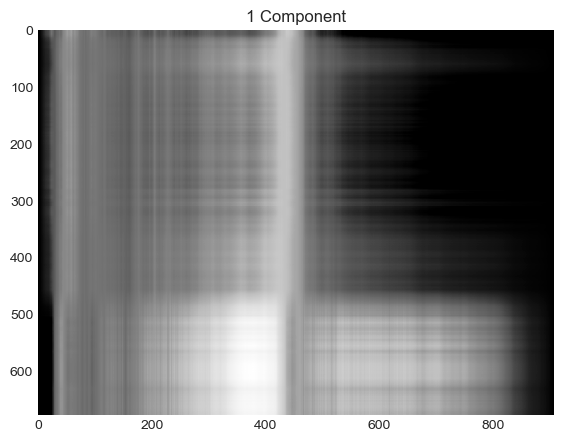

img_transformed.shape=(678, 400), pca.components_.shape=(400, 907)
Compression Ratio: 0.027249547114706008
Proportional Variance Accounted for: 0.7598337


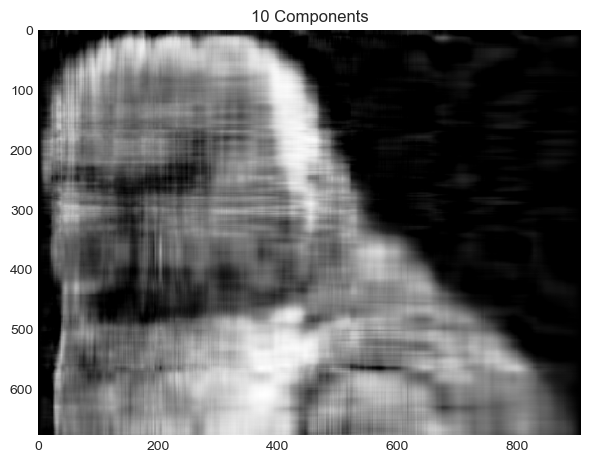

img_transformed.shape=(678, 400), pca.components_.shape=(400, 907)
Compression Ratio: 0.13034803055878078
Proportional Variance Accounted for: 0.9007132


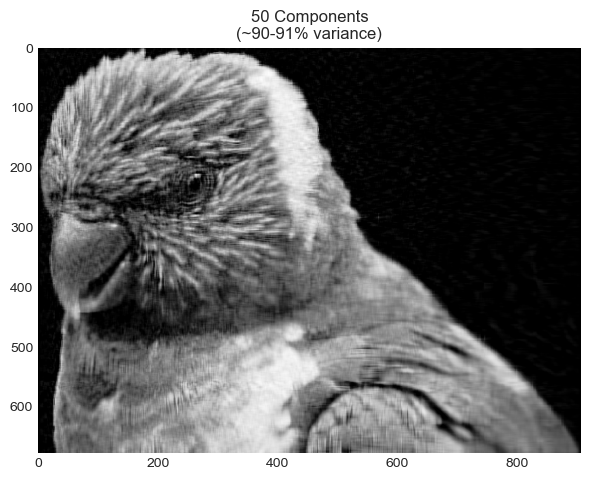

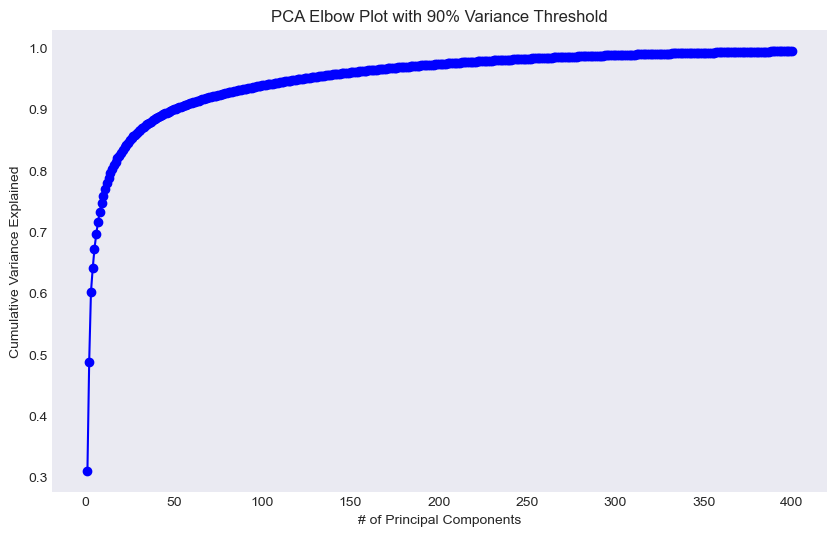

In [40]:
# Your code here. Call reconstruct_grayscale 3 times.
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
target_components = np.where(cumulative_variance >= 0.90)[0][0] + 1
print(f"Number of components needed for 90-91% variance: {target_components}")
print(f"Actual variance explained with {target_components} components: {cumulative_variance[target_components-1]:.3f}")

plt.figure(figsize=(15, 5))


plt.title('1 Component')
reconstruct_grayscale(pca, lorikeet_grayscale, img_orig_means, transformed_lorikeet, 1)

plt.title('10 Components')
reconstruct_grayscale(pca, lorikeet_grayscale, img_orig_means, transformed_lorikeet, 10)


plt.title(f'{target_components} Components\n(~90-91% variance)')
reconstruct_grayscale(pca, lorikeet_grayscale, img_orig_means, transformed_lorikeet, target_components)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')

plt.title('PCA Elbow Plot with 90% Variance Threshold')
plt.xlabel('# of Principal Components')
plt.ylabel('Cumulative Variance Explained')

plt.show()



## Task 4: Preparing the Color Image

A color image needs four pieces of information per pixel - the amount of red, blue, and green, as well as the transparency ([alpha channel](https://en.wikipedia.org/wiki/Alpha_channel)). That means a color image has 3 dimensions (rows, columns, 4). We need to flatten the image to 2 dimensions before we can apply PCA to it. Each feature will now be one of the 4 channels of a pixel. 

### 4a. Import and view an image

1. Import `lorikeet.png` using pyplot's [imread](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)
2. Print the shape of the image. 
3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).(https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html).
4. Show the pyplot


(678, 907, 4)


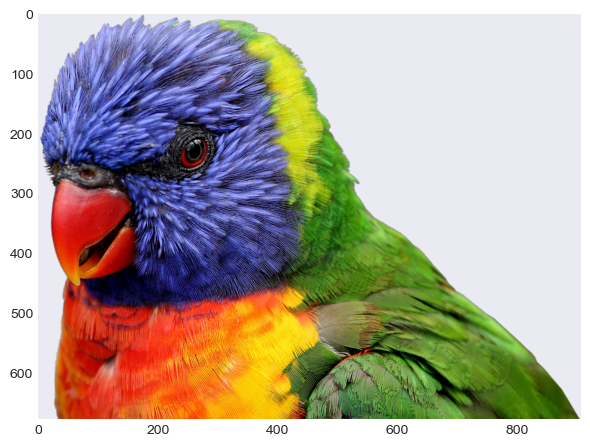

In [41]:
# Your code here
lorikeet = plt.imread('img/lorikeet.png')
# print(lorikeet)
print(lorikeet.shape)

plt.imshow(lorikeet)
plt.show()


### 4b. Reshape and compute original variable means

1. Reshape your image for compression
    1. Reshape your 3 dimensional `(R, C, n_chans)` array to be a 2 dimensional `(R, C*n_chans)` array and assign it to a new variable (`color_flat`).
    2. Print out the shape of `color_flat`.
2. Calculate the [means](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) of each variable in  `color_flat` (columns) and assign it to a new variable `img_color_means`. Your means should have the shape `(C*n_chans,)`
3. Plot the mean row (reshaped to `(1, 3628)` using `imshow`. Since that image will be 1 row and 3628 columns, it will not be tall enough for us to see the color unless we change the aspect ratio. Set the `aspect` parameter to `400`. *The image will appear in grayscale because it will be interpreted by imshow to be times as wide -- each channel will be treated as a separate pixel. This is good because this helps us to think about what the features are in this case.*
4. Plot it again, but in color. Reshape the image to use the 4 color channels, e.g. it should have 1 row, the original number of columns, and 4 color channels. Then plot the new mean row using `imshow` as above, but with `aspect=100`.

Shape of color_flat: (678, 3628)
Shape of img_color_means: (3628,)


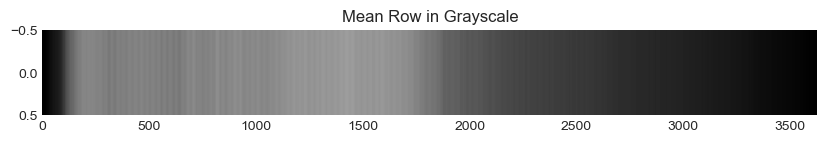

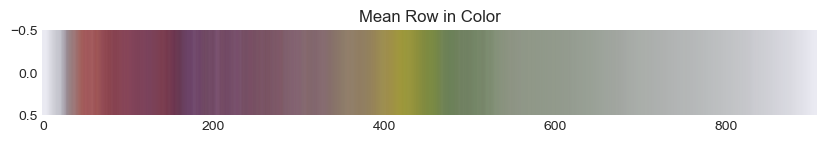

In [42]:
# Your code here

R, C, n_chans = lorikeet.shape
color_flat = lorikeet.reshape(R, C * n_chans)
print("Shape of color_flat:", color_flat.shape)

img_color_means = np.mean(color_flat, axis=0)
print("Shape of img_color_means:", img_color_means.shape)

plt.figure(figsize=(10, 2))
plt.imshow(img_color_means.reshape(1, -1), aspect=400, cmap='gray')
plt.title('Mean Row in Grayscale')
plt.show()

mean_row_color = img_color_means.reshape(1, C, n_chans)
plt.figure(figsize=(10, 2))
plt.imshow(mean_row_color, aspect=100)
plt.title('Mean Row in Color')
plt.show()



*Question 2*: Can you relate the mean row to the entire image? I.e. does this make sense? 

*Answer 2*: 
Yes, the mean row make sense when compared to the original lorikeet image. Both match the original image - going from blue/purple head, to orange chest, to green wings, to white background.

## Task 5:  Compress the Image

### Find the Image's Principal Components

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to extract the image's eigenvectors and the principal components
1. Create an instance of the PCA class with 400 components
2. Call the method `fit_transform` with `color_flat` as the X parameter and saving the results into a new variable representing the Transformed values.
3. Print the shape of the Transformed values and the PCA's components.  The Transformed values should have the shape `(R, 400)` and the PCA's components should have the shape `(400, C*n_chans)`
4. Create an elbow plot of the [cumulative sum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) of the [PCA's](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) explained variance ratio.
    1. The x axis should be `# of Principal Components`
    1. The y axis should be `Proportional Variance Accounted for`
    1. Include a title, and x and y axis labels.

Shape of Transformed Values: (678, 400)
Shape of PCA Components: (400, 3628)


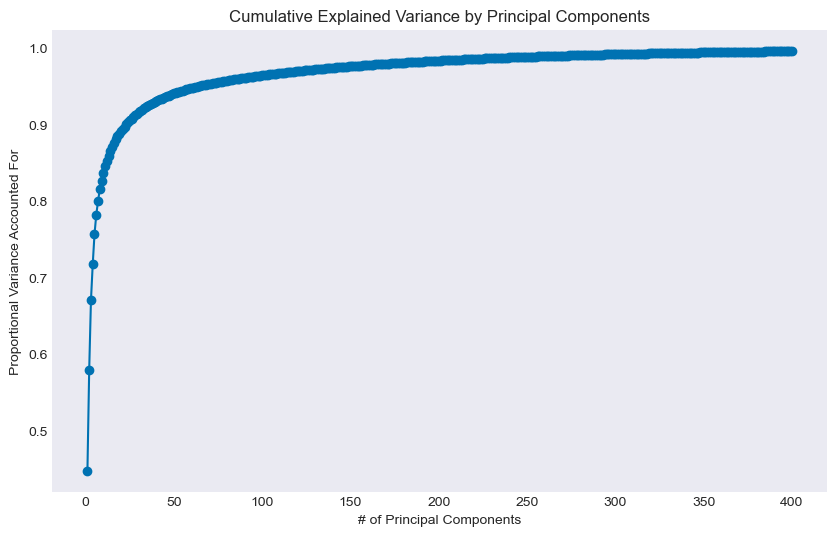

In [43]:
# Your code here

pca = PCA(n_components=400)

transformed_color_flat = pca.fit_transform(color_flat)

print("Shape of Transformed Values:", transformed_color_flat.shape)
print("Shape of PCA Components:", pca.components_.shape)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('# of Principal Components')
plt.ylabel('Proportional Variance Accounted For')
plt.show()


## Task 6: Reconstruct the Image 

### 3a. Reconstruct the image, given the number of principal components

Write a function `reconstruct_color` that follows the steps below. It is almost the same as `reconstruct_grayscale`, but requires more reshaping.

1. Compute the inverse transform:
    1. `transformed_values @ principal_components + orig_var_means`
    2. With shapes `(R, k) @ (k, C*n_chans) + (C*n_chans,)`
    3. With `k` equal to the number of principal components you are keeping
2. Show the reconstructed image
    1. Use numpy's [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) method to clip any values less than 0 or greater than 1 in the reconstructed image.
    2. Reshape the reconstructed image back to the shape of the original image
    3. Display the image using pyplot's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
    4. Show the pyplot
3. Compute the compression ratio of this image
    1. Uncompressed size =  the number of floats in the original image `R*C*n_chans`
    2. Compressed size = the number of floats required to compute the inverse transform `R*k + k*C*n_chans + C*n_chans`
    3. Compression ratio = Compressed size / Uncompressed size

In [44]:
def reconstruct_color(pca, img, img_flat_means, img_transformed, num):
    ''' Reconstruct and display a color image
        pca: the PCA object associated with the flatten image
        img: the original color image (should be 3D)
        img_flat_means: the mean of the flattened (2D) image
        img_transformed: this was computer earlier using fit_transform
        num: the number of principal components to use in the reconstruction
    '''
    temp = img_transformed[:, :num] @ pca.components_[:num] + img_flat_means
    temp = np.clip(temp, 0, 1)
    temp = temp.reshape(img.shape)
    
    plt.imshow(temp)
    plt.show()
    
    uncompressed_size = np.prod(img.shape)
    compressed_size = img_transformed.shape[0] * num + num * pca.components_.shape[1] + pca.components_.shape[1]
    compression_ratio = compressed_size / uncompressed_size
    print("Compression Ratio:", compression_ratio)
    print("Proportional Variance Accounted for:", np.sum(pca.explained_variance_ratio_[:num]) )
    


### 6b. Reconstruct with increasing variation explained

1. Reconstruct the image using just 1 principal components
2. Reconstruct the image using 10 principal components
3. Using the elbow plot, determine a number of principal components which account for roughly 90-91% percent of the proportional variance in the image.

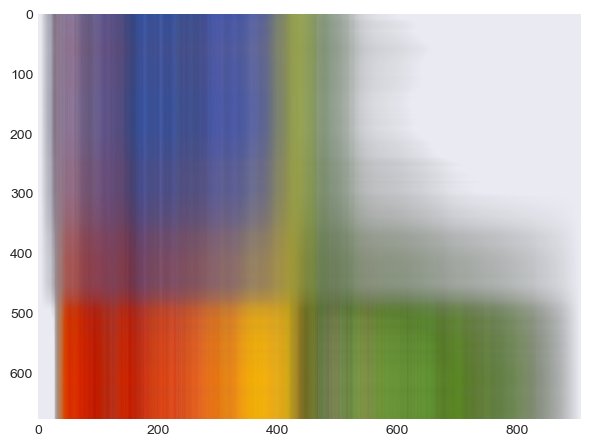

Compression Ratio: 0.0032254864654782697
Proportional Variance Accounted for: 0.4476508


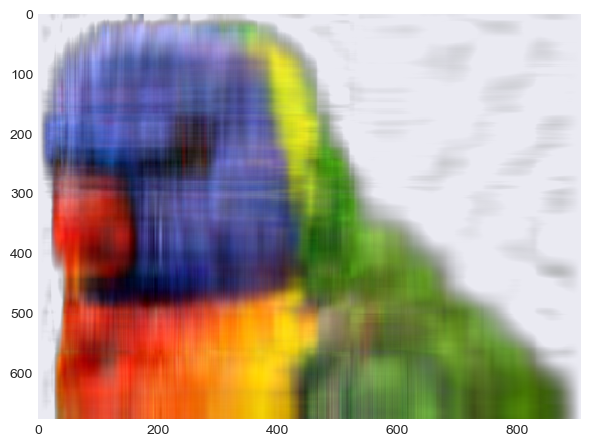

Compression Ratio: 0.018980528371596854
Proportional Variance Accounted for: 0.8369175
50


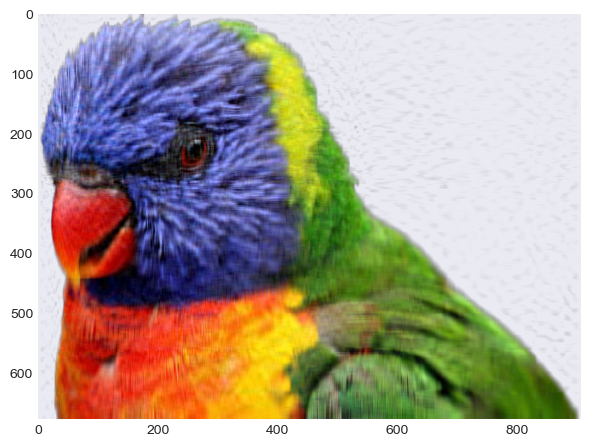

Compression Ratio: 0.08900293684323501
Proportional Variance Accounted for: 0.9412707


In [45]:
# Your code here
reconstruct_color(pca, lorikeet, img_color_means, transformed_color_flat, 1)
reconstruct_color(pca, lorikeet, img_color_means, transformed_color_flat, 10)
num_components_color = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(num_components_color)
reconstruct_color(pca, lorikeet, img_color_means, transformed_color_flat, num_components_color)

## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.